In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt


In [3]:
def real(x):
    return np.sin(x)+np.cos(3*x)

In [24]:
A = 0
B = 1
n = 41
h = (B-A)/(n-1)
x_j = np.linspace(A, B, n)

def basis(x,n, step):
    answ = np.zeros((n,n))
      
    
def q(x):
    return 2*np.sin(x)
def k(x):
    return 2*x

In [22]:
x_j

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975, 1.   ])

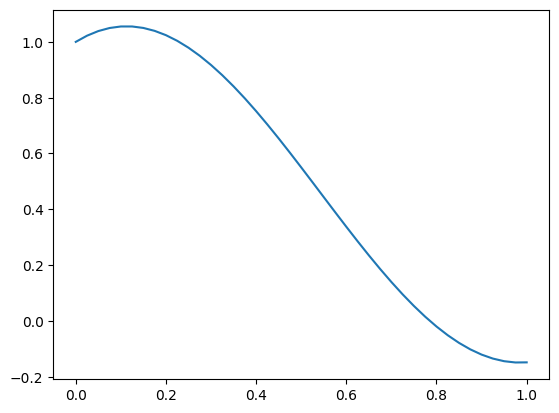

In [23]:
plt.plot( x_j,real(x_j))